In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

data = []
labels = []
classes = 43
cur_path = os.getcwd()

#Retrieving the images and their labels 
for i in range(classes):
    path = os.path.join(cur_path,'train',str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\'+ a)
            image = image.resize((30,30))
            image = np.array(image)
            #sim = Image.fromarray(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

#Converting lists into numpy arrays
data = np.array(data)
labels = np.array(labels)


In [2]:
print(data.shape, labels.shape)

#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


In [3]:
#Building the model VGG16
model = Sequential()
model.add(Conv2D(filters=64, kernel_size=(3, 3),padding = "same", activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=64, kernel_size=(3, 3),padding = "same", activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=128, kernel_size=(3, 3),padding = "same", activation='relu'))
model.add(Conv2D(filters=128, kernel_size=(3, 3),padding = "same", activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=256, kernel_size=(3, 3),padding = "same", activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3, 3),padding = "same", activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Conv2D(filters=512, kernel_size=(3, 3),padding = "same", activation='relu'))
model.add(Conv2D(filters=512, kernel_size=(3, 3),padding = "same", activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten(name="flatten"))
model.add(Dense(256, activation="relu", name="fc1"))
model.add(Dense(128, activation="relu", name="fc2"))
model.add(Dense(43, activation="softmax", name="output"))

#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 15
history = model.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))
model.save("VGG16.h5")

Epoch 1/15
491/491 [==============================] - 701s 1s/step - loss: 1.4567 - accuracy: 0.5811 - val_loss: 0.4964 - val_accuracy: 0.8472
Epoch 2/15
491/491 [==============================] - 703s 1s/step - loss: 0.1901 - accuracy: 0.9461 - val_loss: 0.0735 - val_accuracy: 0.9782
Epoch 3/15
491/491 [==============================] - 703s 1s/step - loss: 0.0923 - accuracy: 0.9755 - val_loss: 0.2925 - val_accuracy: 0.9333
Epoch 4/15
491/491 [==============================] - 703s 1s/step - loss: 0.1065 - accuracy: 0.9735 - val_loss: 0.1854 - val_accuracy: 0.9537
Epoch 5/15
491/491 [==============================] - 702s 1s/step - loss: 0.0833 - accuracy: 0.9800 - val_loss: 0.1355 - val_accuracy: 0.9802
Epoch 6/15
491/491 [==============================] - 702s 1s/step - loss: 0.0903 - accuracy: 0.9803 - val_loss: 0.1005 - val_accuracy: 0.9784
Epoch 7/15
491/491 [==============================] - 703s 1s/step - loss: 0.0704 - accuracy: 0.9846 - val_loss: 0.1302 - val_accuracy: 0.9711

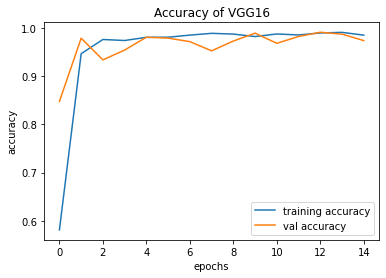

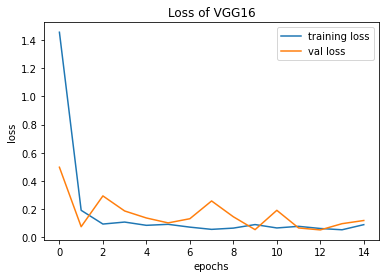

In [4]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy of VGG16')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
 
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss of VGG16')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [5]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score

y_test_demo = pd.read_csv('Test.csv')

labels_demo = y_test_demo["ClassId"].values
imgs = y_test_demo["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test_demo=np.array(data)

#pred = model.predict_classes(X_test)
pred = model.predict(X_test_demo) 
pred = np.argmax(pred, axis=1)  

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels_demo, pred))
model.save('VGG16.h5')

395/395 [==============================] - 44s 112ms/step
0.9333333333333333


In [6]:
#Building the model
model_2 = Sequential()
model_2.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model_2.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model_2.add(MaxPool2D(pool_size=(2, 2)))
model_2.add(Dropout(rate=0.25))
model_2.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model_2.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model_2.add(MaxPool2D(pool_size=(2, 2)))
model_2.add(Dropout(rate=0.25))
model_2.add(Flatten())
model_2.add(Dense(256, activation='relu'))
model_2.add(Dropout(rate=0.5))
model_2.add(Dense(43, activation='softmax'))

#Compilation of the model
model_2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

epochs = 15
history_2 = model_2.fit(X_train, y_train, batch_size=64, epochs=epochs, validation_data=(X_test, y_test))
model_2.save("my_model.h5")

Epoch 1/15
491/491 [==============================] - 86s 174ms/step - loss: 2.6534 - accuracy: 0.4116 - val_loss: 0.5962 - val_accuracy: 0.8511
Epoch 2/15
491/491 [==============================] - 86s 174ms/step - loss: 0.6733 - accuracy: 0.8065 - val_loss: 0.1972 - val_accuracy: 0.9545
Epoch 3/15
491/491 [==============================] - 85s 173ms/step - loss: 0.3752 - accuracy: 0.8924 - val_loss: 0.1147 - val_accuracy: 0.9735
Epoch 4/15
491/491 [==============================] - 85s 173ms/step - loss: 0.2597 - accuracy: 0.9259 - val_loss: 0.0698 - val_accuracy: 0.9820
Epoch 5/15
491/491 [==============================] - 85s 173ms/step - loss: 0.2012 - accuracy: 0.9432 - val_loss: 0.0510 - val_accuracy: 0.9895
Epoch 6/15
491/491 [==============================] - 85s 174ms/step - loss: 0.1822 - accuracy: 0.9481 - val_loss: 0.0627 - val_accuracy: 0.9843
Epoch 7/15
491/491 [==============================] - 85s 173ms/step - loss: 0.1745 - accuracy: 0.9518 - val_loss: 0.0775 - val_ac

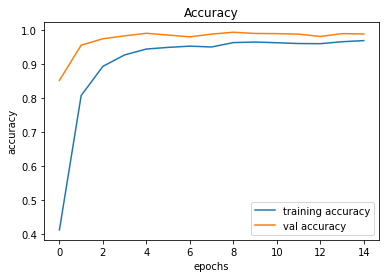

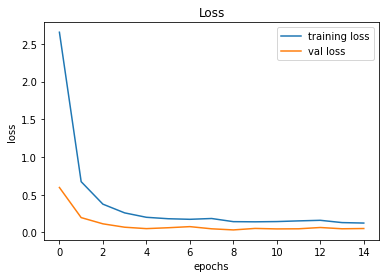

In [7]:
#plotting graphs for accuracy 
plt.figure(0)
plt.plot(history_2.history['accuracy'], label='training accuracy')
plt.plot(history_2.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
 
plt.figure(1)
plt.plot(history_2.history['loss'], label='training loss')
plt.plot(history_2.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

In [8]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score

y_test_demo = pd.read_csv('Test.csv')

labels_demo = y_test_demo["ClassId"].values
imgs = y_test_demo["Path"].values

data=[]

for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))

X_test_demo=np.array(data)

#pred = model.predict_classes(X_test)
pred = model_2.predict(X_test_demo) 
pred = np.argmax(pred, axis=1)  

#Accuracy with the test data
from sklearn.metrics import accuracy_score
print(accuracy_score(labels_demo, pred))
model_2.save('my_model.h5')

395/395 [==============================] - 8s 20ms/step
0.9575613618368963


In [12]:
import tkinter as tk
from tkinter import filedialog
from tkinter import *
from PIL import ImageTk, Image

import numpy
#load the trained model to classify sign
from keras.models import load_model
model_test = load_model('my_model.h5')

#dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }

#initialise GUI
top=tk.Tk()
top.geometry('800x600')
top.title('Traffic sign classification')

p1 = PhotoImage(file = 'icon.png')
top.iconphoto(False, p1)
top.configure(background='#CDCDCD')

label=Label(top,background='#CDCDCD', font=('arial',15,'bold'))
sign_image = Label(top)

def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = numpy.expand_dims(image, axis=0)
    image = numpy.array(image)
    #pred = model.predict_classes(image)[0]
    pred = model_test.predict(image)[0]
    pred = np.argmax(pred, axis=0)  

    sign = classes[pred+1]
    print(sign)
    label.configure(foreground='#011638', text=sign) 

def show_classify_button(file_path):
    classify_b=Button(top,text="Classify Image",command=lambda: classify(file_path),padx=10,pady=5)
    classify_b.configure(background='#364156', foreground='white',font=('arial',10,'bold'))
    classify_b.place(relx=0.79,rely=0.46)

def upload_image():
    try:
        file_path=filedialog.askopenfilename()
        uploaded=Image.open(file_path)
        uploaded.thumbnail(((top.winfo_width()/2.25),(top.winfo_height()/2.25)))
        im=ImageTk.PhotoImage(uploaded)

        sign_image.configure(image=im)
        sign_image.image=im
        label.configure(text='')
        show_classify_button(file_path)
    except:
        pass

upload=Button(top,text="Upload an image",command=upload_image,padx=10,pady=5)
upload.configure(background='#364156', foreground='white',font=('arial',10,'bold'))

upload.pack(side=BOTTOM,pady=50)
sign_image.pack(side=BOTTOM,expand=True)
label.pack(side=BOTTOM,expand=True)
heading = Label(top, text="BÁO CÁO CUỐI KÌ ĐỀ TÀI: NHẬN DIỆN BIỂN BÁO GIAO THÔNG BẰNG CNN",pady=20, font=('arial',15,'bold'))
heading.configure(background='#CDCDCD',foreground='#364156')
heading.pack()
top.mainloop()

1/1 [==============================] - 0s 115ms/step
Veh > 3.5 tons prohibited
1/1 [==============================] - 0s 30ms/step
Speed limit (70km/h)
